# STC Lab 6A : Feature Engineering
<strong>Kaustubh Venkatesh<strong><br>
UID : 2018120033<br>
Roll No. : 36<br>
Date : 19-09-2020

In [10]:
#importing important libraries
from feature_selector import FeatureSelector
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import confusion_matrix, classification_report
from pandas_profiling import ProfileReport

In [11]:
#Importing the dataset
data = pd.read_csv('cardiotocographic.csv')
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [12]:
#shape of the dataset
data.shape

(2126, 22)

In [14]:
#Exploratory analysis using pandas profiling
profile = ProfileReport(data)

In [15]:
profile.to_file('output1.html')

In [5]:
#Data preprocessing
data['NSP'] = data['NSP'].astype('category')

In [6]:
#datatypes of the dataset
data.dtypes

LB             int64
AC           float64
FM           float64
UC           float64
DL           float64
DS           float64
DP           float64
ASTV           int64
MSTV         float64
ALTV           int64
MLTV         float64
Width          int64
Min            int64
Max            int64
Nmax           int64
Nzeros         int64
Mode           int64
Mean           int64
Median         int64
Variance       int64
Tendency       int64
NSP         category
dtype: object

In [7]:
#Summary of the dataset
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,...,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,...,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


In [7]:
#Splitting the dataset into features and target
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [8]:
#Features with missing values
fs = FeatureSelector(data = X, labels = y)
fs.identify_missing(missing_threshold = 0.8)

0 features with greater than 0.80 missing values.



3 features with a correlation magnitude greater than 0.80.



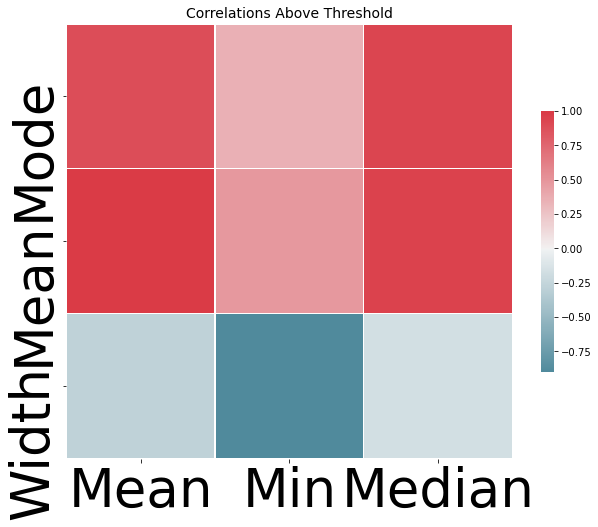

In [9]:
#Features with high colinearity
fs.identify_collinear(correlation_threshold = 0.8)
fs.plot_collinear()

In [10]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,Min,Width,-0.898519
1,Mean,Mode,0.893412
2,Median,Mode,0.933399
3,Median,Mean,0.948251


0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.0686885
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.0662899
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.0322257
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.0397929
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.0528284
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.0608082
Training until validation scores don't improve for 10

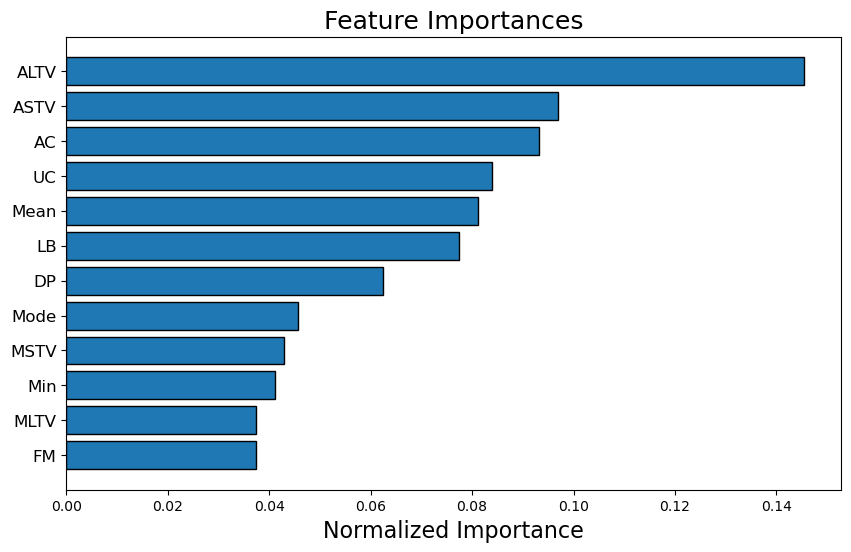

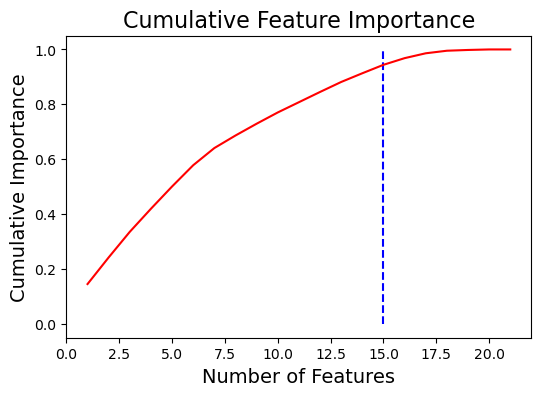

15 features required for 0.92 of cumulative importance


In [11]:
#Feature Selection identify all
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.98, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})
fs.plot_feature_importances(threshold = 0.92, plot_n = 12)

In [12]:
#Remove features with less importance
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'collinear', 'single_unique', 'zero_importance', 'low_importance'] methods have been run

Removed 4 features including one-hot features.


In [17]:
#Shape of the dataset after removal of unimportant features
train_removed_all.head()
train_removed_all.shape

#Using the new X dataset based on feature selection
X_new = train_removed_all
X.shape

(2126, 21)

In [19]:
#Splitting the data into train and test datasets
X_train, X_test, y_train, y_test=train_test_split(X_new,y,test_size=0.2)

In [21]:
#Creating the machine learning model
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
#Predicting values based on the model
ypred = clf.predict(X_test)

In [23]:
#Score of the model
score = clf.score(X_test,y_test)
print("Model Score : {:.3f} %".format(score*100))

Model Score : 88.498 %


In [26]:
#confusion matrix
confusion_matrix(ypred,y_test)

array([[318,  28,   3],
       [  6,  30,   6],
       [  4,   2,  29]], dtype=int64)

In [27]:
#Classification report of the prediction
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       349
           2       0.50      0.71      0.59        42
           3       0.76      0.83      0.79        35

   micro avg       0.88      0.88      0.88       426
   macro avg       0.74      0.82      0.77       426
weighted avg       0.91      0.88      0.89       426



<style>
div.blue { background-color:#e6f0ff; border-radius: 5px; padding: 20px;}
</style>
<div class = "blue">
<strong>Conclusion : </strong>
<br/>
From the experiment conducted, it can be concluded that Feature Engineering is an important part of machine learning. The extraction of features from a raw dataset based on the label's cutoff time is an important step which helps in improving the accuracy and reliability of the model being used.

</div>